# *Introduction To Spark* 
### Resilient Distributed Data Sets (RDDs)

In [10]:
# Find path to PySpark.
import findspark
findspark.init()

# Import PySpark and initialize SparkContext object.
import pyspark
sc = pyspark.SparkContext()

raw_data = sc.textFile("daily_show.tsv")
raw_data.take(5)

['YEAR\tGoogleKnowlege_Occupation\tShow\tGroup\tRaw_Guest_List',
 '1999\tactor\t1/11/99\tActing\tMichael J. Fox',
 '1999\tComedian\t1/12/99\tComedy\tSandra Bernhard',
 '1999\ttelevision actress\t1/13/99\tActing\tTracey Ullman',
 '1999\tfilm actress\t1/14/99\tActing\tGillian Anderson']

### Pipelines

In [11]:
daily_show = raw_data.map(lambda line: line.split('\t'))
daily_show.take(5)
# Hit run to see the output

[['YEAR', 'GoogleKnowlege_Occupation', 'Show', 'Group', 'Raw_Guest_List'],
 ['1999', 'actor', '1/11/99', 'Acting', 'Michael J. Fox'],
 ['1999', 'Comedian', '1/12/99', 'Comedy', 'Sandra Bernhard'],
 ['1999', 'television actress', '1/13/99', 'Acting', 'Tracey Ullman'],
 ['1999', 'film actress', '1/14/99', 'Acting', 'Gillian Anderson']]

### ReduceByKey()

In [12]:
tally = daily_show.map(lambda x: (x[0], 1)).reduceByKey(lambda x,y: x+y)
print(tally)

PythonRDD[8] at RDD at PythonRDD.scala:53


### Explanation

In [13]:
tally.take(tally.count())

[('YEAR', 1),
 ('2002', 159),
 ('2003', 166),
 ('2004', 164),
 ('2007', 141),
 ('2010', 165),
 ('2011', 163),
 ('2012', 164),
 ('2013', 166),
 ('2014', 163),
 ('2015', 100),
 ('1999', 166),
 ('2000', 169),
 ('2001', 157),
 ('2005', 162),
 ('2006', 161),
 ('2008', 164),
 ('2009', 163)]

### Filter

In [15]:
def filter_year(line):
    if line[0] == 'YEAR':
        return False
    else:
        return True

filtered_daily_show = daily_show.filter(lambda line: filter_year(line))
filtered_daily_show

PythonRDD[12] at RDD at PythonRDD.scala:53

### Practice with Piipelines

In [20]:
filtered_daily_show.filter(lambda line: line[1] != '') \
                   .map(lambda line: (line[1].lower(), 1)) \
                   .reduceByKey(lambda x,y: x+y) \
                   .take(5)

sc.stop()

# *Project: Spark Installation and Jupyter Notebook Integration*
###  Testing your Installation

In [21]:
# Find path to PySpark.
import findspark
findspark.init()

# Import PySpark and initialize SparkContext object.
import pyspark
sc = pyspark.SparkContext()

# Read `recent-grads.csv` in to an RDD.
f = sc.textFile('recent-grads.csv')
data = f.map(lambda line: line.split('\n'))

## Testing whether pyspark is working or not
data.take(10)

[['Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs'],
 ['1,2419,PETROLEUM ENGINEERING,2339,2057,282,Engineering,0.120564344,36,1976,1849,270,1207,37,0.018380527,110000,95000,125000,1534,364,193'],
 ['2,2416,MINING AND MINERAL ENGINEERING,756,679,77,Engineering,0.101851852,7,640,556,170,388,85,0.117241379,75000,55000,90000,350,257,50'],
 ['3,2415,METALLURGICAL ENGINEERING,856,725,131,Engineering,0.153037383,3,648,558,133,340,16,0.024096386,73000,50000,105000,456,176,0'],
 ['4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258,1123,135,Engineering,0.107313196,16,758,1069,150,692,40,0.050125313,70000,43000,80000,529,102,0'],
 ['5,2405,CHEMICAL ENGINEERING,32260,21239,11021,Engineering,0.341630502,289,25694,23170,5180,16697,1672,0.061097712,65000,50000,75000,18314,4440,972'],
 ['6,2418,NUCLEAR ENGINEERING,2573,2200,373,En

# *Transformations and Actions*
### Introduction to the Data

In [22]:
raw_hamlet = sc.textFile("hamlet.txt")
raw_hamlet.take(5)

['hamlet@0\t\tHAMLET',
 'hamlet@8',
 'hamlet@9',
 'hamlet@10\t\tDRAMATIS PERSONAE',
 'hamlet@29']

### The Map Method

In [23]:
split_hamlet = raw_hamlet.map(lambda line: line.split('\t'))
split_hamlet.take(5)

[['hamlet@0', '', 'HAMLET'],
 ['hamlet@8'],
 ['hamlet@9'],
 ['hamlet@10', '', 'DRAMATIS PERSONAE'],
 ['hamlet@29']]

### The FlatMap Method

In [24]:
def hamlet_speaks(line):
    id = line[0]
    speaketh = False
    
    if "HAMLET" in line:
        speaketh = True
    
    if speaketh:
        yield id,"hamlet speaketh!"

hamlet_spoken = split_hamlet.flatMap(lambda x: hamlet_speaks(x))
hamlet_spoken.take(5)

[('hamlet@0', 'hamlet speaketh!'),
 ('hamlet@75', 'hamlet speaketh!'),
 ('hamlet@1004', 'hamlet speaketh!'),
 ('hamlet@9144', 'hamlet speaketh!'),
 ('hamlet@12313', 'hamlet speaketh!')]

### Filter Using a Named Function

In [25]:
def filter_hamlet_speaks(line):
    if "HAMLET" in line:
        return True
    else:
        return False
    
hamlet_spoken_lines = split_hamlet.filter(lambda line: filter_hamlet_speaks(line))
hamlet_spoken_lines.take(5)

[['hamlet@0', '', 'HAMLET'],
 ['hamlet@75', 'HAMLET', 'son to the late, and nephew to the present king.'],
 ['hamlet@1004', '', 'HAMLET'],
 ['hamlet@9144', '', 'HAMLET'],
 ['hamlet@12313',
  'HAMLET',
  '[Aside]  A little more than kin, and less than kind.']]

### Actions

In [26]:
spoken_count = 0
spoken_101 = list()
spoken_count = hamlet_spoken_lines.count()
spoken_collect = hamlet_spoken_lines.collect()
spoken_101 = spoken_collect[100]
spoken_101

['hamlet@58478', 'HAMLET', 'A goodly one; in which there are many confines,']

# *Challenge: Transforming Hamlet into a Data Set*
### Extract Line Numbers

In [32]:
raw_hamlet = sc.textFile("hamlet.txt")
split_hamlet = raw_hamlet.map(lambda line: line.split('\t'))
split_hamlet.take(5)

[['hamlet@0', '', 'HAMLET'],
 ['hamlet@8'],
 ['hamlet@9'],
 ['hamlet@10', '', 'DRAMATIS PERSONAE'],
 ['hamlet@29']]

In [34]:
def format_id(x):
    id = x[0].split('@')[1]
    results = list()
    results.append(id)
    if len(x) > 1:
        for y in x[1:]:
            results.append(y)
    return results

hamlet_with_ids = split_hamlet.map(lambda line: format_id(line))
hamlet_with_ids.take(10)

[['0', '', 'HAMLET'],
 ['8'],
 ['9'],
 ['10', '', 'DRAMATIS PERSONAE'],
 ['29'],
 ['30'],
 ['31', 'CLAUDIUS', 'king of Denmark. (KING CLAUDIUS:)'],
 ['74'],
 ['75', 'HAMLET', 'son to the late, and nephew to the present king.'],
 ['131']]

### Remove Blank Values

In [35]:
hamlet_with_ids.take(5)
real_text = hamlet_with_ids.filter(lambda line: len(line) > 1)
hamlet_text_only = real_text.map(lambda line: [l for l in line if l != ''])
hamlet_text_only.take(10)

[['0', 'HAMLET'],
 ['10', 'DRAMATIS PERSONAE'],
 ['31', 'CLAUDIUS', 'king of Denmark. (KING CLAUDIUS:)'],
 ['75', 'HAMLET', 'son to the late, and nephew to the present king.'],
 ['132', 'POLONIUS', 'lord chamberlain. (LORD POLONIUS:)'],
 ['177', 'HORATIO', 'friend to Hamlet.'],
 ['204', 'LAERTES', 'son to Polonius.'],
 ['230', 'LUCIANUS', 'nephew to the king.'],
 ['261', 'VOLTIMAND', '|'],
 ['273', '|']]

### Remove Pipe Characters

In [39]:
hamlet_text_only.take(10)
def fix_pipe(line):
    results = list()
    for l in line:
        if l == "|":
            pass
        elif "|" in l:
            fmtd = l.replace("|", "")
            results.append(fmtd)
        else:
            results.append(l)
    return results

clean_hamlet = hamlet_text_only.map(lambda line: fix_pipe(line))
clean_hamlet.take(5)

[['0', 'HAMLET'],
 ['10', 'DRAMATIS PERSONAE'],
 ['31', 'CLAUDIUS', 'king of Denmark. (KING CLAUDIUS:)'],
 ['75', 'HAMLET', 'son to the late, and nephew to the present king.'],
 ['132', 'POLONIUS', 'lord chamberlain. (LORD POLONIUS:)']]

# *Spark DataFrames*
### The Spark DataFrame: An Introduction

In [40]:
f = open('census_2010.json')

for i in range(0,4):
    print(f.readline())

{"females": 1994141, "total": 4079669, "males": 2085528, "age": 0, "year": 2010}

{"females": 1997991, "total": 4085341, "males": 2087350, "age": 1, "year": 2010}

{"females": 2000746, "total": 4089295, "males": 2088549, "age": 2, "year": 2010}

{"females": 2002756, "total": 4092221, "males": 2089465, "age": 3, "year": 2010}



### Reading in Data

In [41]:
# Import SQLContext
from pyspark.sql import SQLContext

# Pass in the SparkContext object `sc`
sqlCtx = SQLContext(sc)

# Read JSON data into a DataFrame object `df`
df = sqlCtx.read.json("census_2010.json")

# Print the type
print(type(df))

<class 'pyspark.sql.dataframe.DataFrame'>


### Schema

In [42]:
sqlCtx = SQLContext(sc)
df = sqlCtx.read.json("census_2010.json")
df.printSchema()

root
 |-- age: long (nullable = true)
 |-- females: long (nullable = true)
 |-- males: long (nullable = true)
 |-- total: long (nullable = true)
 |-- year: long (nullable = true)



### Pandas vs Spark DataFrames

In [43]:
df.show(5)

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  0|1994141|2085528|4079669|2010|
|  1|1997991|2087350|4085341|2010|
|  2|2000746|2088549|4089295|2010|
|  3|2002756|2089465|4092221|2010|
|  4|2004366|2090436|4094802|2010|
+---+-------+-------+-------+----+
only showing top 5 rows



### Row Objects

In [44]:
first_five = df.head(5)
for r in first_five:
    print(r.age)

0
1
2
3
4


###  Selecting Columns

In [45]:
df[['age']].show()
df[['age', 'males', 'females']].show()

+---+
|age|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
| 10|
| 11|
| 12|
| 13|
| 14|
| 15|
| 16|
| 17|
| 18|
| 19|
+---+
only showing top 20 rows

+---+-------+-------+
|age|  males|females|
+---+-------+-------+
|  0|2085528|1994141|
|  1|2087350|1997991|
|  2|2088549|2000746|
|  3|2089465|2002756|
|  4|2090436|2004366|
|  5|2091803|2005925|
|  6|2093905|2007781|
|  7|2097080|2010281|
|  8|2101670|2013771|
|  9|2108014|2018603|
| 10|2114217|2023289|
| 11|2118390|2026352|
| 12|2132030|2037286|
| 13|2159943|2060100|
| 14|2195773|2089651|
| 15|2229339|2117689|
| 16|2263862|2146942|
| 17|2285295|2165852|
| 18|2285990|2168175|
| 19|2272689|2159571|
+---+-------+-------+
only showing top 20 rows



### Filtering Rows

In [46]:
five_plus = df[df['age'] > 5]
five_plus.show()

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  6|2007781|2093905|4101686|2010|
|  7|2010281|2097080|4107361|2010|
|  8|2013771|2101670|4115441|2010|
|  9|2018603|2108014|4126617|2010|
| 10|2023289|2114217|4137506|2010|
| 11|2026352|2118390|4144742|2010|
| 12|2037286|2132030|4169316|2010|
| 13|2060100|2159943|4220043|2010|
| 14|2089651|2195773|4285424|2010|
| 15|2117689|2229339|4347028|2010|
| 16|2146942|2263862|4410804|2010|
| 17|2165852|2285295|4451147|2010|
| 18|2168175|2285990|4454165|2010|
| 19|2159571|2272689|4432260|2010|
| 20|2151448|2259690|4411138|2010|
| 21|2140926|2244039|4384965|2010|
| 22|2133510|2229168|4362678|2010|
| 23|2132897|2218195|4351092|2010|
| 24|2135789|2208905|4344694|2010|
| 25|2136497|2197148|4333645|2010|
+---+-------+-------+-------+----+
only showing top 20 rows



### Using Column Comparisons as Filters

In [47]:
df[df['females'] < df['males']].show()

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  0|1994141|2085528|4079669|2010|
|  1|1997991|2087350|4085341|2010|
|  2|2000746|2088549|4089295|2010|
|  3|2002756|2089465|4092221|2010|
|  4|2004366|2090436|4094802|2010|
|  5|2005925|2091803|4097728|2010|
|  6|2007781|2093905|4101686|2010|
|  7|2010281|2097080|4107361|2010|
|  8|2013771|2101670|4115441|2010|
|  9|2018603|2108014|4126617|2010|
| 10|2023289|2114217|4137506|2010|
| 11|2026352|2118390|4144742|2010|
| 12|2037286|2132030|4169316|2010|
| 13|2060100|2159943|4220043|2010|
| 14|2089651|2195773|4285424|2010|
| 15|2117689|2229339|4347028|2010|
| 16|2146942|2263862|4410804|2010|
| 17|2165852|2285295|4451147|2010|
| 18|2168175|2285990|4454165|2010|
| 19|2159571|2272689|4432260|2010|
+---+-------+-------+-------+----+
only showing top 20 rows



### Converting Spark DataFrames to pandas DataFrames

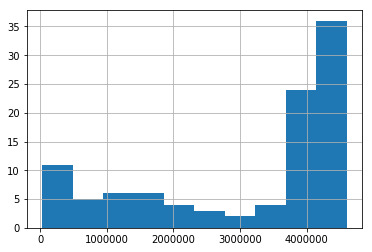

In [50]:
import matplotlib.pyplot as plt
pandas_df = df.toPandas()
pandas_df['total'].hist()
plt.show()

# *Spark SQL*
### Register the DataFrame as a Table

In [51]:
from pyspark.sql import SQLContext
sqlCtx = SQLContext(sc)
df = sqlCtx.read.json("census_2010.json")
df.registerTempTable('census2010')
tables = sqlCtx.tableNames()
print(tables)

['census2010']


### Querying

In [52]:
sqlCtx.sql('select age from census2010').show()

+---+
|age|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
| 10|
| 11|
| 12|
| 13|
| 14|
| 15|
| 16|
| 17|
| 18|
| 19|
+---+
only showing top 20 rows



### Filtering

In [53]:
query = ''
query = 'select males,females from census2010 where age > 5 and age < 15'
sqlCtx.sql(query).show()

+-------+-------+
|  males|females|
+-------+-------+
|2093905|2007781|
|2097080|2010281|
|2101670|2013771|
|2108014|2018603|
|2114217|2023289|
|2118390|2026352|
|2132030|2037286|
|2159943|2060100|
|2195773|2089651|
+-------+-------+



### Mixing Functionality

In [54]:
query = 'select males,females from census2010'
sqlCtx.sql(query).describe().show()

+-------+------------------+-----------------+
|summary|             males|          females|
+-------+------------------+-----------------+
|  count|               101|              101|
|   mean|1520095.3168316833|1571460.287128713|
| stddev|  818587.208016823|748671.0493484351|
|    min|              4612|            25673|
|    max|           2285990|          2331572|
+-------+------------------+-----------------+



### Multiple Tables

In [55]:
from pyspark.sql import SQLContext
sqlCtx = SQLContext(sc)
df = sqlCtx.read.json("census_2010.json")
df.registerTempTable('census2010')
df_2000 = sqlCtx.read.json("census_2000.json")
df_1990 = sqlCtx.read.json("census_1990.json")
df_1980 = sqlCtx.read.json("census_1980.json")

df_2000.registerTempTable('census2000')
df_1990.registerTempTable('census1990')
df_1980.registerTempTable('census1980')
tables = sqlCtx.tableNames()
print(tables)

['census1980', 'census1990', 'census2000', 'census2010']


### Joins

In [56]:
query = """
 select census2010.total, census2000.total
 from census2010
 inner join census2000
 on census2010.age=census2000.age
"""

sqlCtx.sql(query).show()

+-------+-------+
|  total|  total|
+-------+-------+
|4079669|3733034|
|4085341|3825896|
|4089295|3904845|
|4092221|3970865|
|4094802|4024943|
|4097728|4068061|
|4101686|4101204|
|4107361|4125360|
|4115441|4141510|
|4126617|4150640|
|4137506|4152174|
|4144742|4145530|
|4169316|4139512|
|4220043|4138230|
|4285424|4137982|
|4347028|4133932|
|4410804|4130632|
|4451147|4111244|
|4454165|4068058|
|4432260|4011192|
+-------+-------+
only showing top 20 rows



### SQL Functions

In [57]:
query = """
 select sum(census2010.total), sum(census2000.total), sum(census1990.total)
 from census2010
 inner join census2000
 on census2010.age=census2000.age
 inner join census1990
 on census2010.age=census1990.age
"""
sqlCtx.sql(query).show()

+----------+----------+----------+
|sum(total)|sum(total)|sum(total)|
+----------+----------+----------+
| 312247116| 284594395| 254506647|
+----------+----------+----------+

